In [13]:
'''
Author: Ramses Partida
Date: 04/24/2021
ISTA 131 
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import seaborn as sns

df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['sex'] = np.where(df['sex']==1, 'male', 'female')
df['cp'] = np.where(df['cp']==0, 'typical angina', np.where(df['cp']==1, 'atypical angina',
    np.where(df['cp']==2, 'non-anginal pain', np.where(df['cp']==3, 'asymptomatic', 0))))
df['fbs'] = np.where(df['fbs']==1, 'true', 'false')
df['restecg'] = np.where(df['restecg']==0, 'normal', 'abnormal')
df['exng'] = np.where(df['exng']==1, 'yes', 'no')

In [15]:
#cp = chest pain type
#thalachh = maximum heart rate
#This function uses a piechart to show the different types of chest pain among patients
def pie(data, x, y):
    count = Counter(data)
    count = pd.DataFrame({x:count.keys(), y:count.values()})
    fig = px.pie(count, x, y)
    fig.update_layout(legend_title=dict(text=x))
    fig.show()

def barplot(data, x, y, hue):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.barplot(data=data, x=x, y=y, hue=hue)
    plt.show()

In [16]:
pie(df['cp'], 'Chest pain type', 'Number of patients')

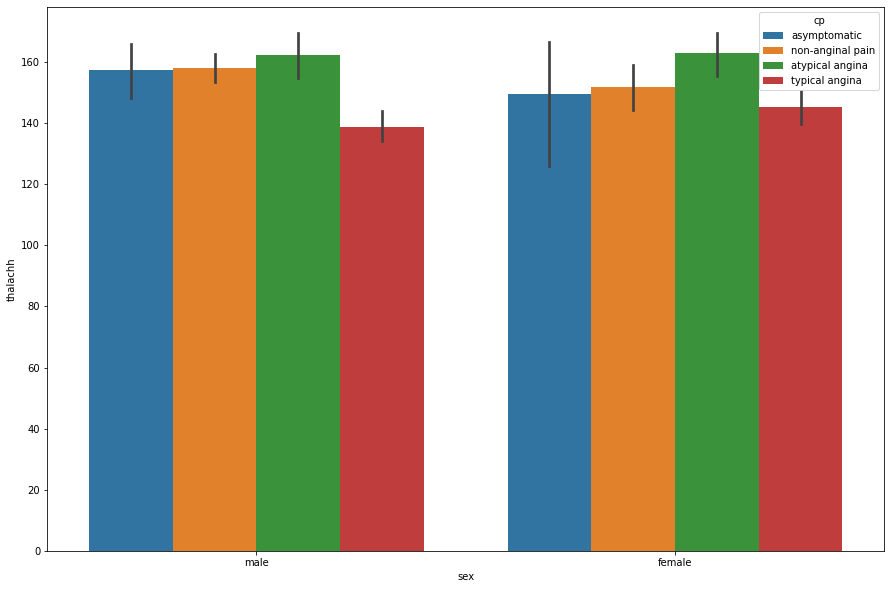

In [17]:
col = ['sex', 'thalachh', 'cp'],

for i in col:
    barplot(data=df, x=i[0], y=i[1], hue=i[2])

<AxesSubplot:xlabel='age', ylabel='thalachh'>

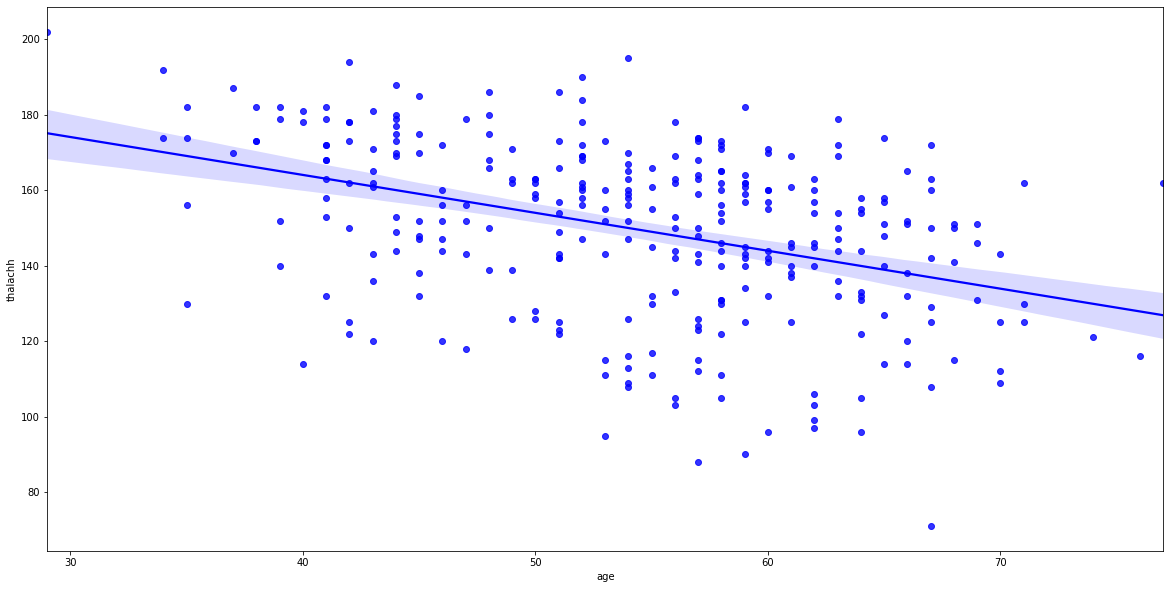

In [18]:
plt.figure(figsize = (20,10))
sns.regplot(x = df['age'], y = df['thalachh'], color = 'blue')